In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv.imread("./data/frog.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

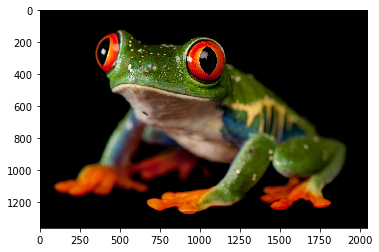

In [3]:
plt.imshow(img)

# Drawing on image

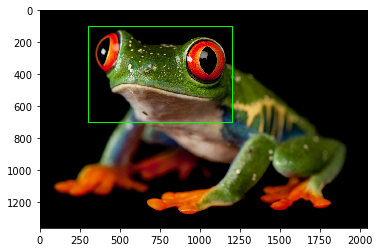

In [4]:
img_rect = np.copy(img)
cv.rectangle(img_rect,(300,100),(1200,700),(0,255,0),3)
plt.imshow(img_rect)

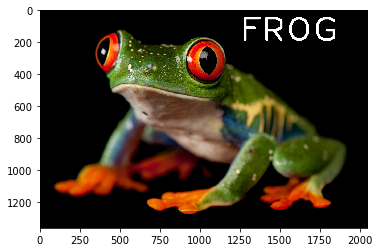

In [5]:
img_text = np.copy(img)
cv.putText(img_text, "FROG", (1250, 200), cv.FONT_HERSHEY_PLAIN, 15, (255,255,255), 15, cv.LINE_AA)
plt.imshow(img_text)

# Filters/Kernels

In [31]:
kernel = np.array([[-3,0,3], [-10,0,10], [-3,0,3]]) # Scharr filter
kernel3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) # Sharpen
kernel2 = np.array([[1,1,1], [0,0,0], [-1,-1,-1]]) / 3 # top pixels
kernel4 = np.array([[-1,-1,-1], [0,0,0], [1,1,1]]) # bottom pixels

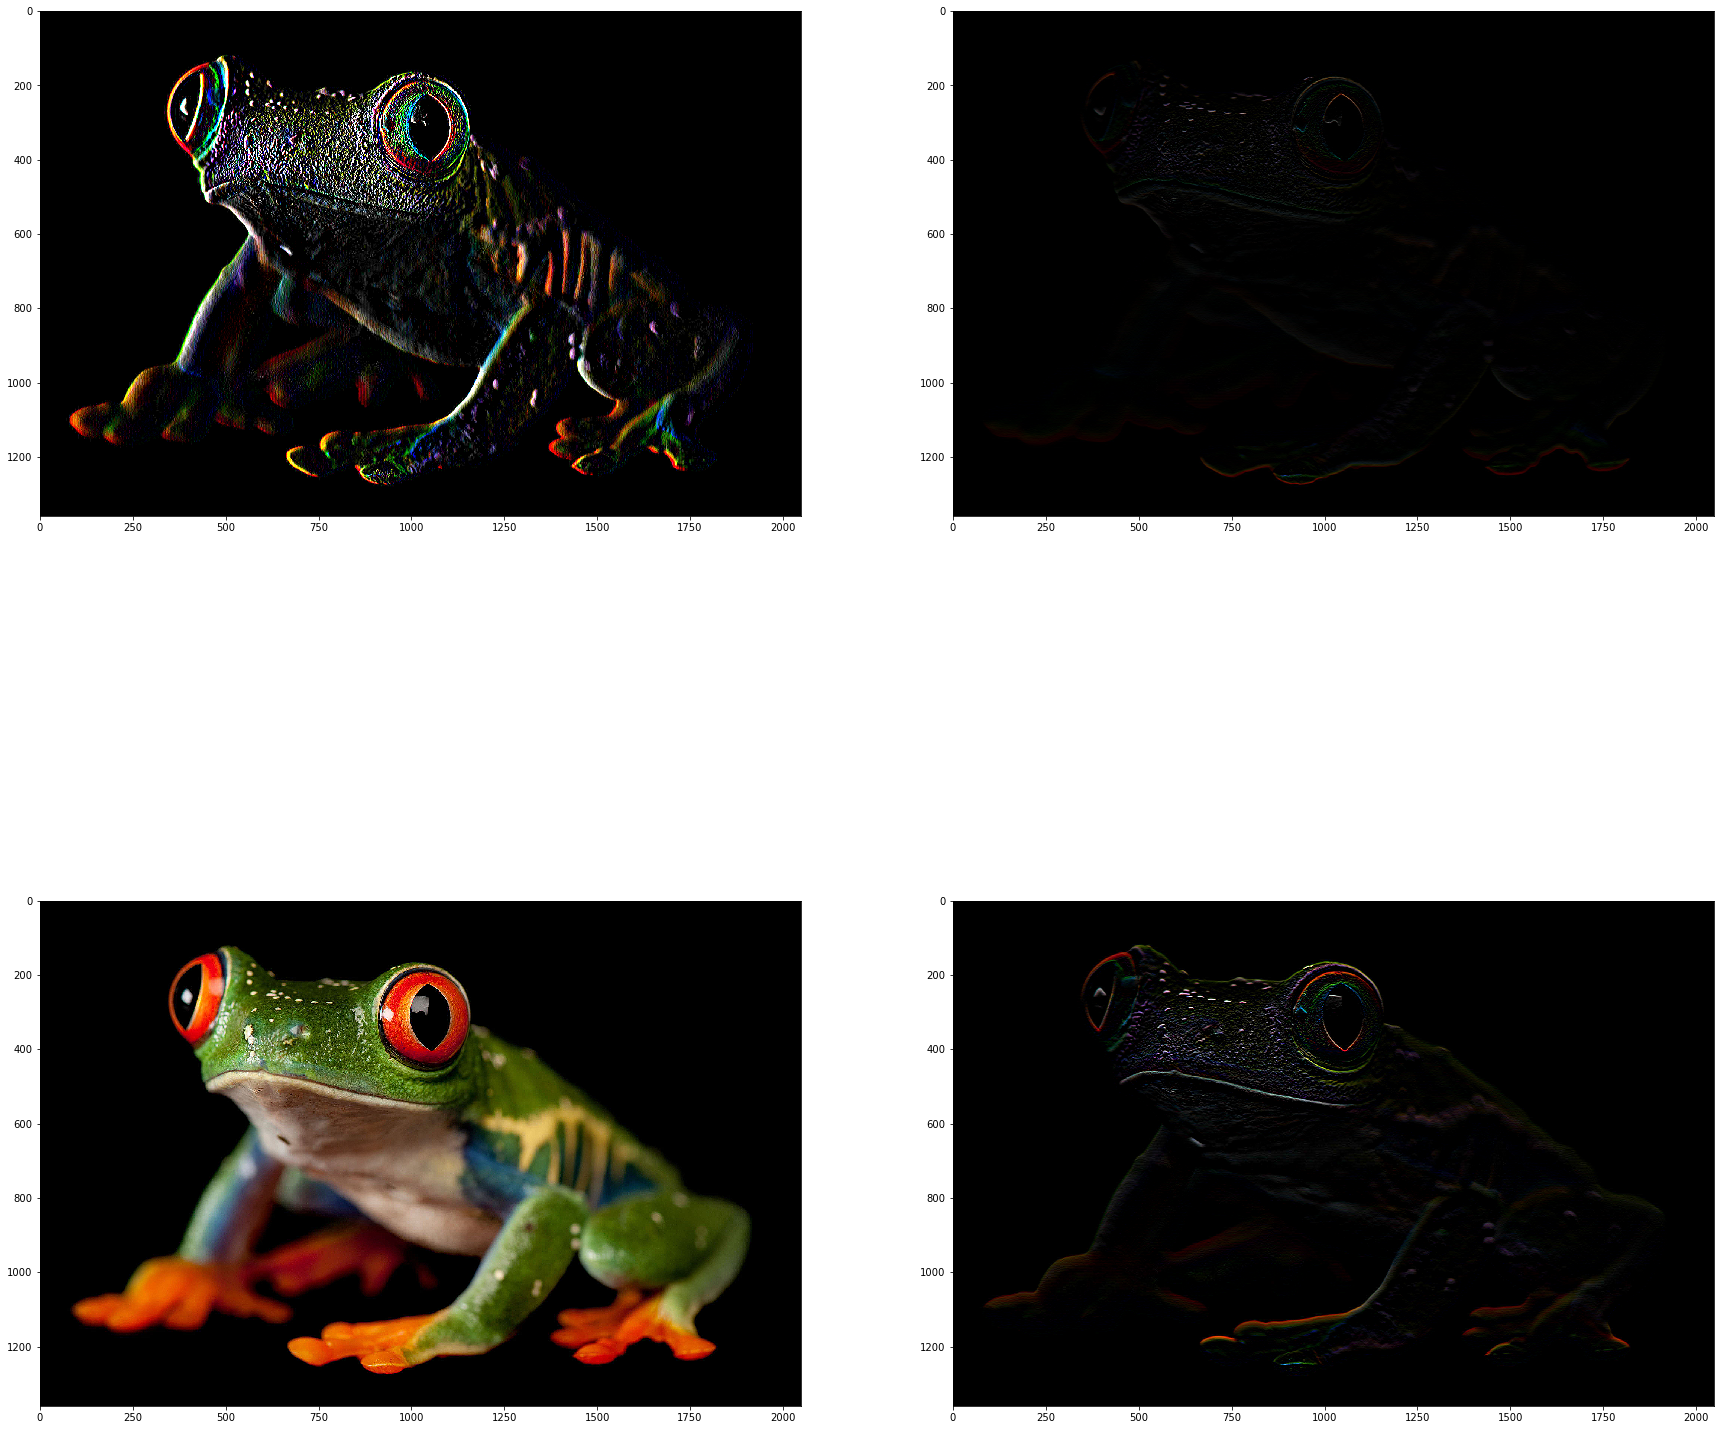

In [33]:
_, axarr = plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(cv.filter2D(img, -1, kernel))
axarr[0,1].imshow(cv.filter2D(img, -1, kernel2))
axarr[1,0].imshow(cv.filter2D(img, -1, kernel3))
axarr[1,1].imshow(cv.filter2D(img, -1, kernel4))

# Brightness/contrast

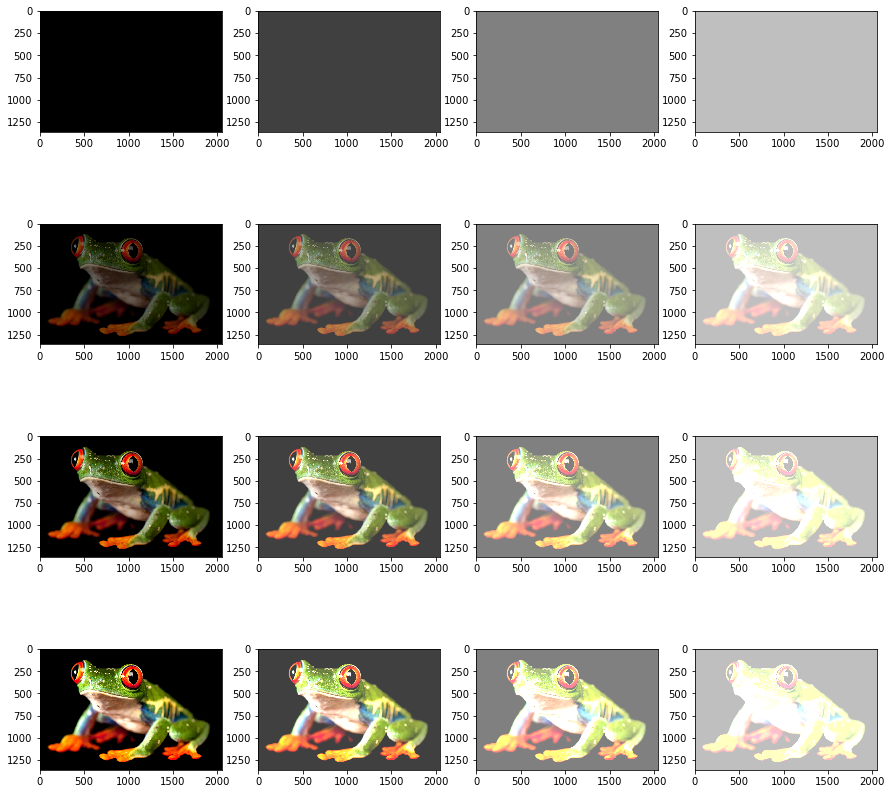

In [47]:
# linear function of the image. alpha * img + beta

_, axarr = plt.subplots(4,4, figsize=(15,15))
for i in range(4):
    for j in range(4):
        a = 0.5 * i
        b = j * 255/4
        
        axarr[i, j].imshow(cv.convertScaleAbs(img, alpha=a, beta=b))
        

In [48]:
def gamma(img, g):
    return 255 * (img/255)**g

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

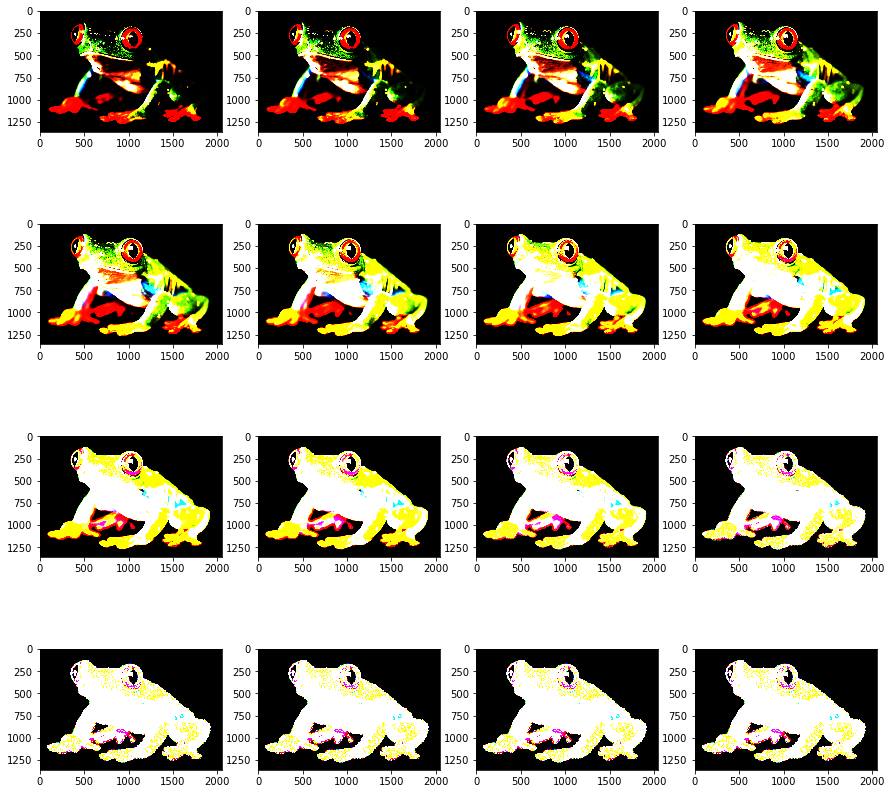

In [53]:
_, axarr = plt.subplots(4,4, figsize=(15,15))
for i in range(4):
    for j in range(4):
        n = i * 4 + j
        g = 1.2**(12 - n)
        axarr[i, j].imshow(gamma(img, g))

# Image morphology

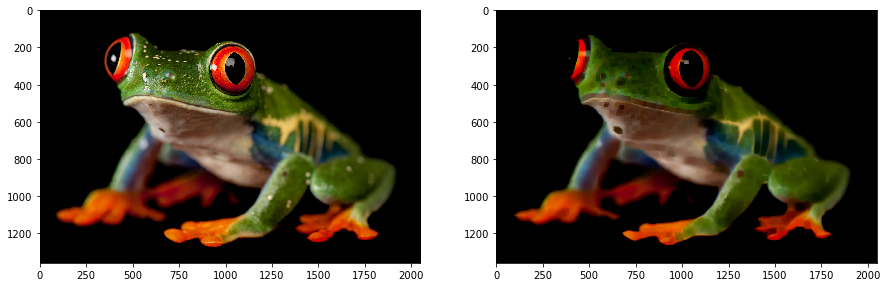

In [74]:
_, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(img)
axarr[1].imshow(cv.erode(img, cv.getStructuringElement(cv.MORPH_RECT, (20,20))))

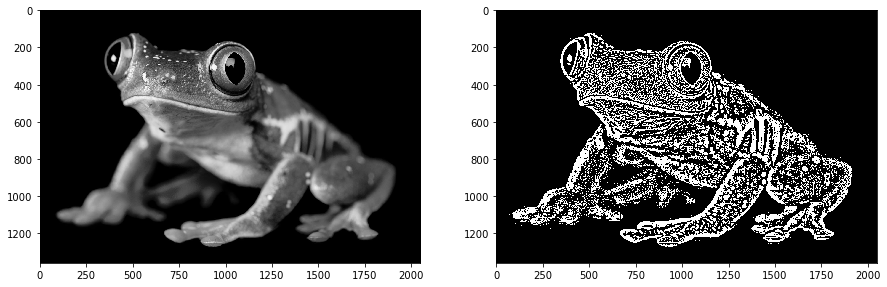

In [92]:
_, axarr = plt.subplots(1,2, figsize=(15,15))

img_greyscale = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_binary = cv.adaptiveThreshold(img_greyscale, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 0)
axarr[0].imshow(img_greyscale, cmap="Greys_r")
axarr[1].imshow(img_binary, cmap="Greys_r")

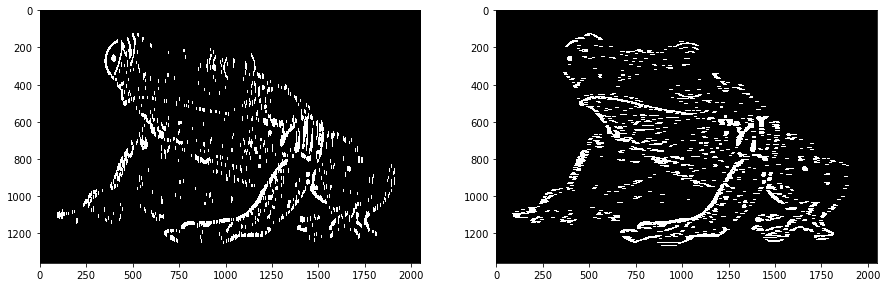

In [99]:
struct_vertical = cv.getStructuringElement(cv.MORPH_RECT, (1, 17))
struct_horizontal = cv.getStructuringElement(cv.MORPH_RECT, (17, 1))

_, axarr = plt.subplots(1,2, figsize=(15,15))

axarr[0].imshow(cv.dilate(cv.erode(img_binary, struct_vertical), struct_vertical), cmap="Greys_r")
axarr[1].imshow(cv.dilate(cv.erode(img_binary, struct_horizontal), struct_horizontal), cmap="Greys_r")

# Object detection

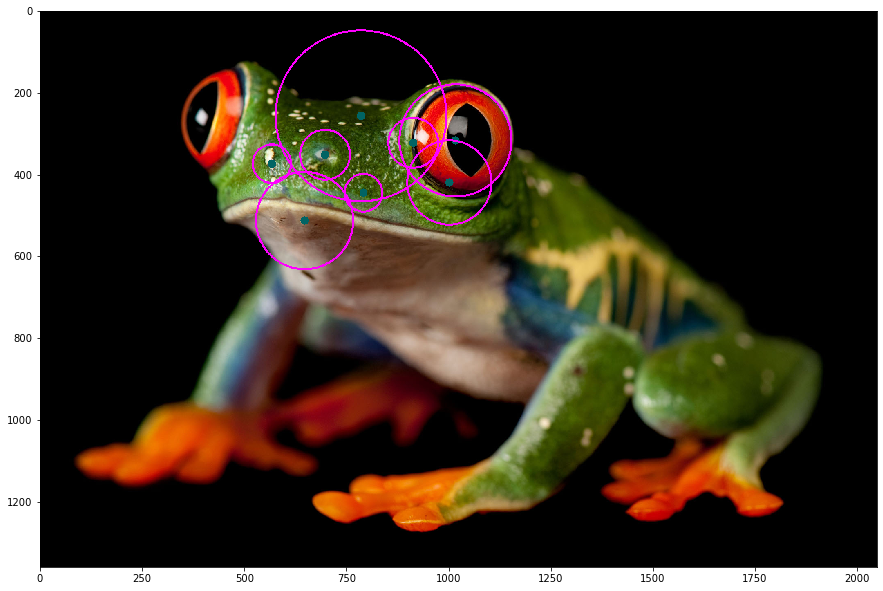

In [114]:
img_circles = np.copy(img)
circles = cv.HoughCircles(img_greyscale, cv.HOUGH_GRADIENT, 1, 100, maxRadius=300)

for x,y,r in circles[0]:
    # circle center
    cv.circle(img_circles, (x, y), 10, (0, 100, 100), -1)
    # circle outline
    cv.circle(img_circles, (x, y), r, (255, 0, 255), 3)

_, ax = plt.subplots(figsize=(15,15))
ax.imshow(img_circles, )

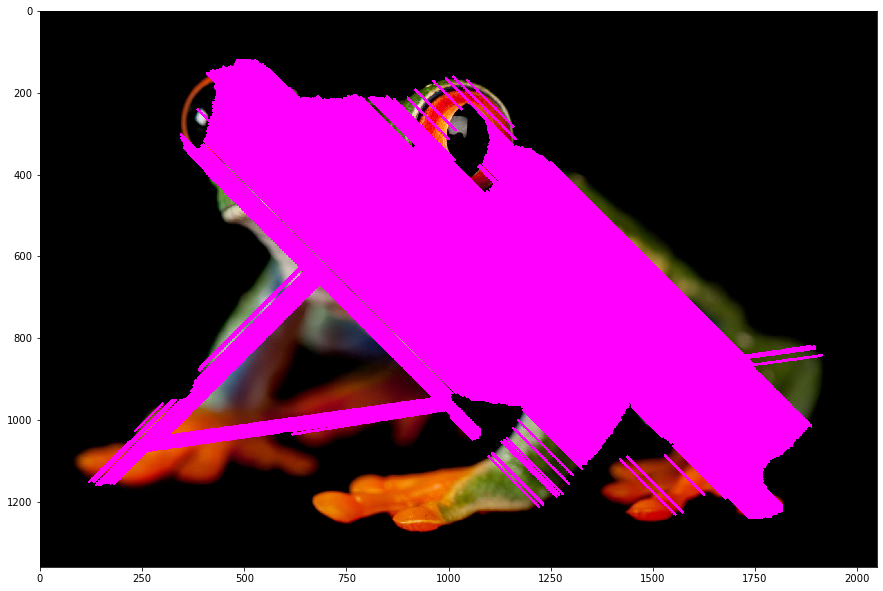

In [248]:
img_lines = np.copy(img)
img_laplace = cv.Laplacian(img_greyscale, 2, ksize=15)
img_laplace = cv.cvtColor(cv.cvtColor(img_laplace, cv.COLOR_GRAY2RGB), cv.COLOR_RGB2GRAY)

lines = cv.HoughLinesP(img_greyscale, 1, np.pi/180, 1500, None, 50)

for x1,y1,x2,y2 in lines[:, 0]:
    cv.line(img_lines, (x1,y1), (x2,y2), (255, 0, 255), 5)

_, ax = plt.subplots(figsize=(15,15))
ax.imshow(img_lines, )

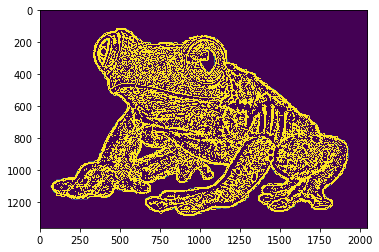

In [249]:
plt.imshow(img_laplace)

# Histograms

In [315]:
# calculate histograms
hist_bins = range(256)
hist_vals = []
for channel in range(3):
    hist_vals.append(np.histogram(img[:,:,channel], hist_bins)[0])

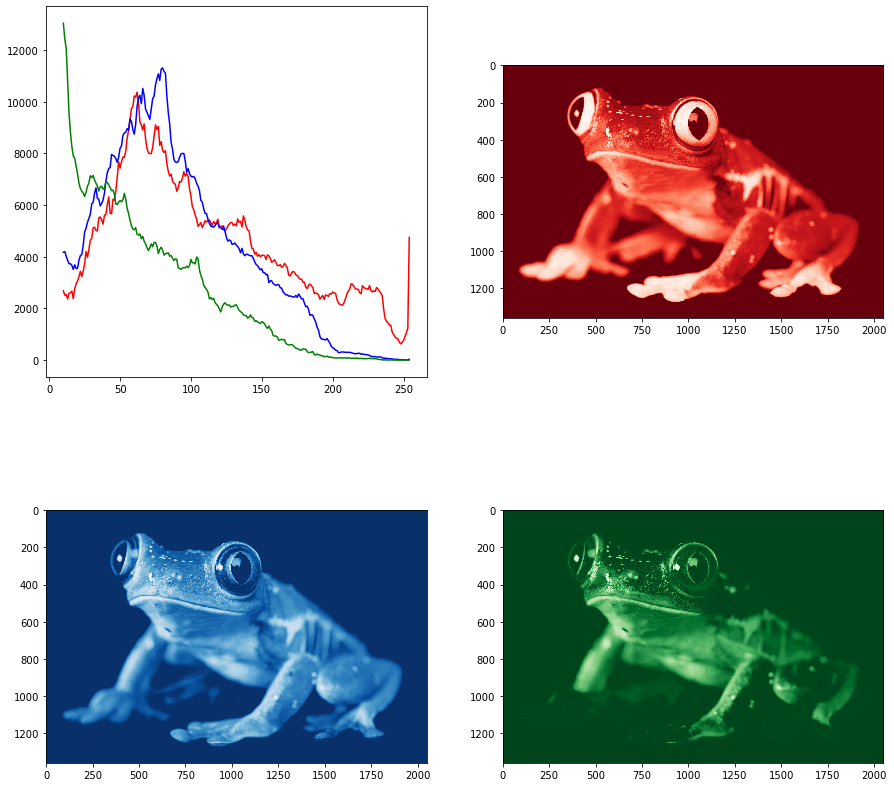

In [330]:
_, axarr = plt.subplots(2, 2, figsize=(15,15))
# way more black pixels, so they are filtered out to see the colour distributions
min_brightness = 10
cmaps = ["Reds_r", "Blues_r", "Greens_r"]
for i, col in enumerate(["red", "blue", "green"]):
    axarr[0,0].plot(hist_bins[min_brightness:-1], hist_vals[i][min_brightness:], color=col)
    
    axarr[(i+1)//2, (i+1) % 2].imshow(img[:,:,i], cmap=cmaps[i])

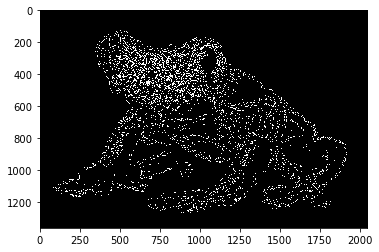

In [357]:
img_canny = cv.Canny(cv.blur(img_greyscale, (3,3)), 10, 20)
plt.imshow(img_canny, cmap="Greys_r")

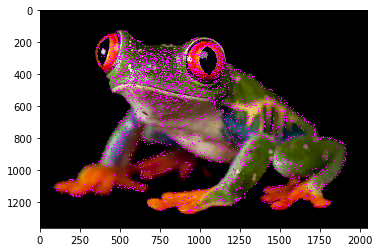

In [361]:
img_contours = np.copy(img)
contours, cont_hierarchy = cv.findContours(img_canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img_contours, contours, -1, (255, 0, 255))

plt.imshow(img_contours)